# Data Preparation

## Import modules and packages

In [1]:
import csv
import math
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt

## Data Preparation

**Data source:** https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [2]:
# Read in files
data_raw = pd.read_csv('data/card_transdata.csv')
data_raw.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
# Number of rows
print('Number of rows in data_raw:', len(data_raw))

# Number of columns 
print('Number of columns in data_raw:', len(data_raw.columns))

Number of rows in data_raw: 1000000
Number of columns in data_raw: 8


In [4]:
data_raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Check for missing values
np.isnan(data_raw.values).sum()

0

No missing values

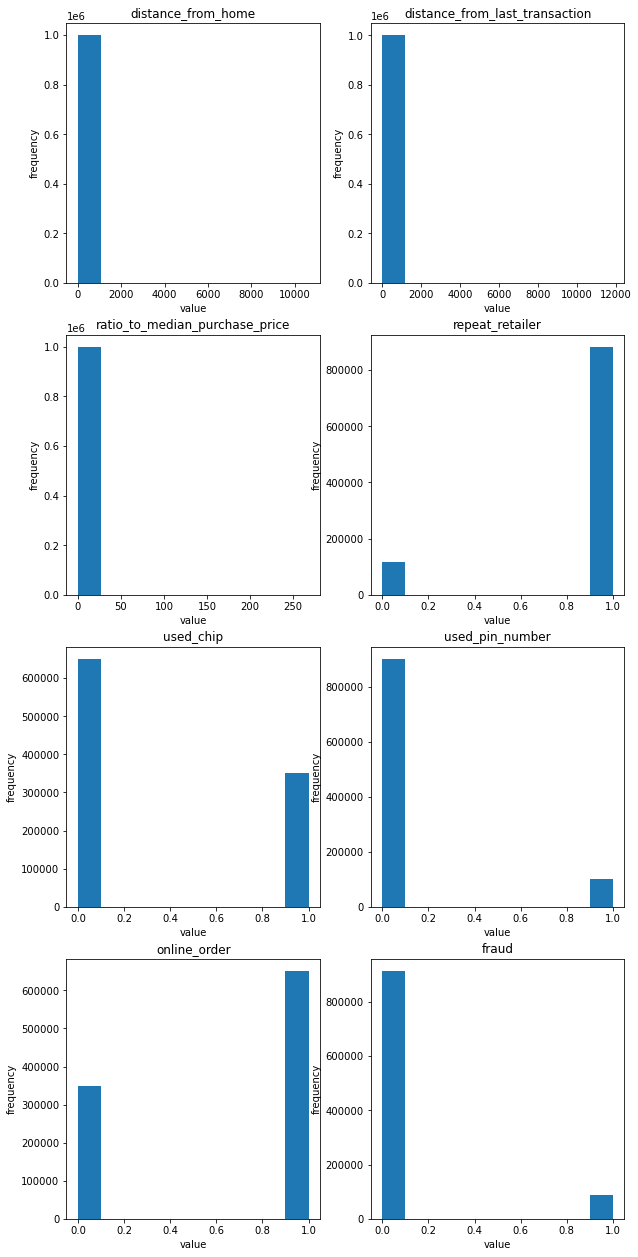

In [9]:
# Plot distributions of non-bonary features
cols1 = [data_raw.columns]
cols = data_raw.columns.tolist()

plt.figure(figsize=(10, 22))
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.hist(np.array(data_raw[cols[i]]))
    plt.title(cols[i])
    plt.xlabel('value')
    plt.ylabel('frequency')
plt.show()

It seems that the first 3 columns may have some very large outliers based on their histogram. The last 5 columns seem to be binary. 

The following steps will look further into these. 

In [10]:
# Confirm that the last 5 columns are binary categorical 
for column in data_raw.columns[3:9]:
    print(data_raw[column].value_counts())
    print()

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

1.0    650552
0.0    349448
Name: online_order, dtype: int64

0.0    912597
1.0     87403
Name: fraud, dtype: int64



The following columns are confirmed to be binary:
- repeat_retailer 
- used_chip 
- used_pin_number
- online_order
- fraud

No transformation needed.

The remaining three columns will be further looked into to determine if any transformation needs to be done. 

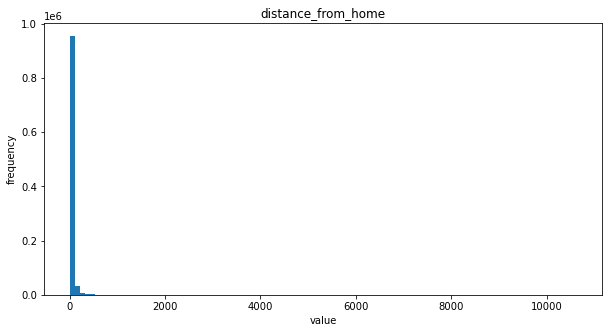

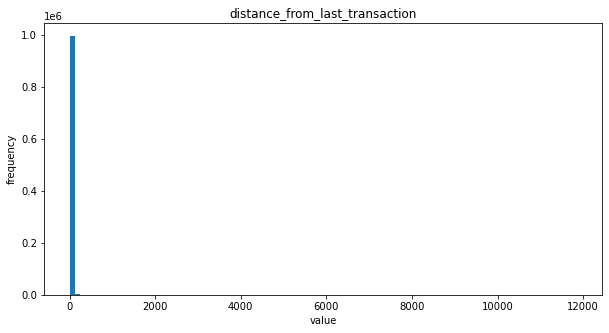

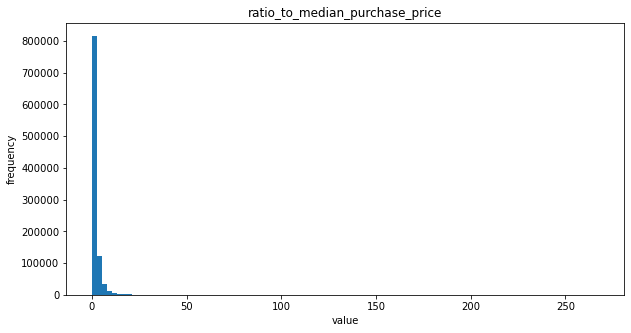

In [11]:
# Plot the first three columns 
plt.figure(figsize=(10,5))
plt.hist(np.array(data_raw['distance_from_home']), bins = 100)
plt.title('distance_from_home')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(np.array(data_raw['distance_from_last_transaction']), bins = 100)
plt.title('distance_from_last_transaction')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(np.array(data_raw['ratio_to_median_purchase_price']), bins = 100)
plt.title('ratio_to_median_purchase_price')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

Even splitting the first 3 columns into 100 bins in their respective histograms doesn't show a fully clear picture of what the distribution looks like near its the larger portion of the distribution's mass. 

But this does confirm that there are indeed large outliers, standardizing them would be appropriate. 

The columns in question are:
- distance_from_home	
- distance_from_last_transaction	
- ratio_to_median_purchase_price

In [12]:
# Standardize distance_from home
data_raw['norm_distance_from_home'] = StandardScaler().fit_transform(
    data_raw['distance_from_home'].values.reshape(-1,1)) # standardize

# Standardize distance_from_last_transaction 
data_raw['norm_distance_from_last_transaction'] = StandardScaler().fit_transform(
    data_raw['distance_from_last_transaction'].values.reshape(-1,1)) # standardize

# Standardize ratio_to_median_purchase_price
data_raw['norm_ratio_to_median_purchase_price'] = StandardScaler().fit_transform(
    data_raw['ratio_to_median_purchase_price'].values.reshape(-1,1)) # standardize

Now that the data is cleaned and scaled, unncessary columns will be removed.

In [13]:
# Drop unnecessary columns
data_raw = data_raw.drop(['distance_from_home', 
                           'distance_from_last_transaction', 
                           'ratio_to_median_purchase_price'], axis=1)

It seems that this dataset is clean enough to go to the EDA phase. 